# Introduction

### Question
Does the introduction of Airbnb rentals decrease the cost of rent in a location? In particular, how has the introduction of Airbnb rentals in San Diego affected the cost of rent in San Diego homes?

### Hypothesis

We predict that the introduction of Airbnb rentals decreases the overall cost of rent in a location (in this particular case San Diego), because Airbnb introduces another form of competition for homeowners looking to rent out their homes. Even though the majority of Airbnb users are looking for short term rentals (1 month or less), this can still force homeowners to have to lower rental prices to compete with people who might turn to Airbnb as their first option because of brand loyalty, or Airbnb for having the reputation of lower prices. We will conduct this test with an alpha value of 0.05


### Background

This question was of interest because of all the recent news behind the battles between local government and Airbnb. For example, in June 2016, Airbnb sued San Francisco over legislation that would require all Airbnb hosts to be verified before listing their housing (1). The lawsuits don’t just stop there. Los Angeles, New York, and Chicago have also cracked down on regulating listings from Airbnb (2).


While many of these lawsuits originate from neighbors being annoyed at random strangers staying in the homes being listed on Airbnb, the controversy that we want to explore is the effect on housing. According to many homeowners and renters, in Portland, the introduction of Airbnb has skyrocketed the price of rent (3). In accordance to this blog post, landlords can make more money by listing their properties on Airbnb than by leasing it traditionally. This leads to units being taken off of the housing market, which then increases the price of rent.
We believe this question is important because of how many people are affected by it. More than 100 million people have stayed in an Airbnb (4). From the perspective of a guest, Airbnb serves as a way to allow anyone to feel like a local, anywhere. From the perspective of a host, Airbnb serves as a way to make money through hospitality. But is this sense of inclusion worth the price that the housing market has to pay?

### References (include a link): 
1. https://techcrunch.com/2016/06/27/airbnb-sues-san-francisco/ 
2. http://money.cnn.com/2016/06/22/technology/airbnb-regulations/ 
3. https://medium.com/@ptu/how-airbnb-exacerbates-portlands-housing-crisis-9418bb4c9b20 
4. https://www.bloomberg.com/news/articles/2016-07-11/airbnb-faces-growing-pains-as-it-passes-100-million-users

# Data Description

This dataset contains the housing info of 6608 Airbnb listings in San Diego, from [Inside Airbnb](http://insideairbnb.com/get-the-data.html). The data contains all the info about every Airbnb listing, and more importantly we plan to make use of the ID, zip code, latitude, and longitude from this data to analyze the population density of the Airbnbs in different San Diego neighborhoods. This data will allow us to plot the density of Airbnb listings per neighborhood in San Diego, allowing an easy visualization of which neighborhoods in San Diego have the most listings, and from there we can analyze how the quantity of these listings affect the median rent prices in each neighborhood.

# Data Cleaning/Pre-processing

Begin by reading in the Airbnb listings file, _listings.csv_

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv('listings.csv')
print(df)

            id                            listing_url       scrape_id  \
0     11204286  https://www.airbnb.com/rooms/11204286  20160706203047   
1      7972006   https://www.airbnb.com/rooms/7972006  20160706203047   
2      7727710   https://www.airbnb.com/rooms/7727710  20160706203047   
3     13124681  https://www.airbnb.com/rooms/13124681  20160706203047   
4      3469225   https://www.airbnb.com/rooms/3469225  20160706203047   
5       877473    https://www.airbnb.com/rooms/877473  20160706203047   
6      3124507   https://www.airbnb.com/rooms/3124507  20160706203047   
7      3432507   https://www.airbnb.com/rooms/3432507  20160706203047   
8      3249729   https://www.airbnb.com/rooms/3249729  20160706203047   
9     11756336  https://www.airbnb.com/rooms/11756336  20160706203047   
10    12173670  https://www.airbnb.com/rooms/12173670  20160706203047   
11    13157364  https://www.airbnb.com/rooms/13157364  20160706203047   
12     9756570   https://www.airbnb.com/rooms/97565

We then drop all columns with unnecessary data, only preserving the **id**, **zipcode**, **latitude**, **longitude**, and **first_review** columns. 

In [25]:
df = df[['id', 'zipcode', 'latitude', 'longitude', 'first_review']]
print(df)

            id  zipcode   latitude   longitude first_review
0     11204286  92154.0  32.581882 -117.001940   2016-05-23
1      7972006  91913.0  32.653029 -116.976812   2015-10-04
2      7727710  91914.0  32.661477 -116.971813   2015-08-23
3     13124681  91915.0  32.638694 -116.951252   2016-06-13
4      3469225  91915.0  32.638942 -116.938891          NaN
5       877473  91915.0  32.638285 -116.939373   2013-07-17
6      3124507  91915.0  32.637183 -116.934752   2014-05-27
7      3432507  91915.0  32.637594 -116.935737   2014-07-15
8      3249729  91915.0  32.637588 -116.934959   2014-07-30
9     11756336  91915.0  32.635328 -116.958756   2016-03-28
10    12173670  91915.0  32.647356 -116.955336   2016-05-07
11    13157364  91915.0  32.634342 -116.953567          NaN
12     9756570  91915.0  32.628250 -116.961313   2016-01-03
13    10687910  91915.0  32.627788 -116.959399   2016-02-01
14     7938260  91910.0  32.627834 -117.027535   2015-09-15
15    10779932  91910.0  32.628429 -117.

To check if there's any missing data in this data set, we will count the number of NaNs.

In [26]:
n_nan = df.isnull().values.sum()
print(n_nan)

2127


We then proceed to remove all rows from df with missing data/NaN values.

In [27]:
df = df.dropna()
print(df)

            id  zipcode   latitude   longitude first_review
0     11204286  92154.0  32.581882 -117.001940   2016-05-23
1      7972006  91913.0  32.653029 -116.976812   2015-10-04
2      7727710  91914.0  32.661477 -116.971813   2015-08-23
3     13124681  91915.0  32.638694 -116.951252   2016-06-13
5       877473  91915.0  32.638285 -116.939373   2013-07-17
6      3124507  91915.0  32.637183 -116.934752   2014-05-27
7      3432507  91915.0  32.637594 -116.935737   2014-07-15
8      3249729  91915.0  32.637588 -116.934959   2014-07-30
9     11756336  91915.0  32.635328 -116.958756   2016-03-28
10    12173670  91915.0  32.647356 -116.955336   2016-05-07
12     9756570  91915.0  32.628250 -116.961313   2016-01-03
13    10687910  91915.0  32.627788 -116.959399   2016-02-01
14     7938260  91910.0  32.627834 -117.027535   2015-09-15
15    10779932  91910.0  32.628429 -117.027548   2016-02-13
16    13301630  91910.0  32.628160 -117.025583   2016-06-22
17     5285136  91910.0  32.633652 -117.

Now we want to parse the data for the year of the first review, to obtain the 2016 and 2013 listings data, and we'll use the split function to extract the year from the _firstreview_ column.

In [28]:
df['year'] = 0
for ind, row in df.iterrows():
    df.loc[ind, 'year'] = int(row["first_review"].split("-")[0])


Now we just need to extract the rows where their values are 2016 or 2013 and put it either into df16 or df13, respectively.

In [29]:
df16 = df[df["year"] == 2016]
df13 = df[df["year"] == 2013]

The zip code for Arlington, Virginia is buggy, because the dataset has mistakes. We're going to parse all zipcodes from Quandl as well, getting the csv data of the median market price of homes in that zip code over a time frame of 2010-2016, before parsing that data to get the difference in rent from 2013-2016 for that zip code.
To do this, we're going to parse the csv for each zip code, and read it into a dataframe, and put it into a dictionary (keys are the zip code, values are the dataframe of date + median housing income at that date for that zip code)

In [30]:
from urllib.request import urlopen
df_clean = df.loc[(df["zipcode"] != 22204.0)]
zip_codes = df_clean["zipcode"]
zip_codes = zip_codes.drop_duplicates()
err_zip_codes = []
zip_dict = {}
for row in zip_codes:
    str_zip = str(row)[:5]
    print(str_zip)
    link = "https://www.quandl.com/api/v3/datasets/ZILL/Z" + str_zip + "_RMP.csv?api_key=v6bdCEehswfe2ByMswy_"
    try:   
        data = urlopen(link).read()
        filename = "data/ZILL" + str_zip + ".csv"
        with open(filename, "wb" ) as code :
            code.write(data)
        zip_dict[int(str_zip)] = pd.read_csv(filename)
    except:
        err_zip_codes.append(str_zip)
    
#zip_dict


92154
91913
91914
91915
91910
91911
92124
92120
91950
92114
92102
92104
92103
92101
92113
92117
92110
92139
92123
92128
92130
92126
92105
92115
92111
92014
91945
92108
92116
92037
92109
92122
92119
92107
92106
92017
92129
92127
92067
91942
92173
92131
92121
91902
92075


Now remove all zip codes that don't have the relevant data we're looking for (in the err_zip_codes array) for clean data. There only happens to be one zip code (92017) so we just remove all rows in df_clean with that specific zip code

In [31]:
df_clean = df_clean.loc[(df_clean["zipcode"] != 92017.0)]
zip_dict.pop(92017, None)
df_clean

,id,zipcode,latitude,longitude,first_review,year
0,11204286,92154.0,32.581882,-117.001940,2016-05-23,2016
1,7972006,91913.0,32.653029,-116.976812,2015-10-04,2015
2,7727710,91914.0,32.661477,-116.971813,2015-08-23,2015
3,13124681,91915.0,32.638694,-116.951252,2016-06-13,2016
5,877473,91915.0,32.638285,-116.939373,2013-07-17,2013
6,3124507,91915.0,32.637183,-116.934752,2014-05-27,2014
7,3432507,91915.0,32.637594,-116.935737,2014-07-15,2014
8,3249729,91915.0,32.637588,-116.934959,2014-07-30,2014
9,11756336,91915.0,32.635328,-116.958756,2016-03-28,2016
10,12173670,91915.0,32.647356,-116.955336,2016-05-07,2016


In [32]:
for k, v in zip_dict.items():
    df_temp = v
    df_temp["year"] = ""
    df_temp["month"] = ""
    df_temp["day"] = ""
    for ind, row in df_temp.iterrows():
        s = df_temp.loc[ind]["Date"]
        l = s.split("-")
        df_temp.loc[ind, "year"] = l[0]
        df_temp.loc[ind, "month"] = l[1]
        df_temp.loc[ind, "day"] = l[2]

zip_dict

{91902:           Date   Value  year month day
 0   2015-06-30  1975.0  2015    06  30
 1   2015-05-31  1675.0  2015    05  31
 2   2015-04-30  1721.0  2015    04  30
 3   2015-03-31  1851.0  2015    03  31
 4   2015-02-28  2595.0  2015    02  28
 5   2015-01-31  2400.0  2015    01  31
 6   2014-12-31  2100.0  2014    12  31
 7   2014-11-30  1975.0  2014    11  30
 8   2014-10-31  1921.0  2014    10  31
 9   2014-09-30  2335.0  2014    09  30
 10  2014-08-31  2095.0  2014    08  31
 11  2014-07-31  2595.0  2014    07  31
 12  2014-06-30  2600.0  2014    06  30
 13  2014-05-31  2450.0  2014    05  31
 14  2014-04-30  2166.0  2014    04  30
 15  2014-03-31  2050.0  2014    03  31
 16  2014-02-28  2200.0  2014    02  28
 17  2014-01-31  1995.0  2014    01  31
 18  2013-12-31  1700.0  2013    12  31
 19  2013-11-30  1400.0  2013    11  30
 20  2013-10-31  1797.0  2013    10  31
 21  2013-09-30  2195.0  2013    09  30
 22  2013-08-31  1752.0  2013    08  31
 23  2013-07-31  1540.0  2013    

We now want to calculate the average rent price of houses in 2013 and 2016, so we iterate over the Dictionary and add it to counter variables appropriately.

In [33]:
rent_avg_dict = {}
for k, v in zip_dict.items():
    df_temp = v
    sum13 = 0
    count13 = 0
    sum16 = 0
    count16 = 0
    for ind, row in df_temp.iterrows():
        if df_temp.ix[ind]["year"] == "2016":
            sum16 += df_temp.ix[ind]["Value"] 
            count16+= 1
        if df_temp.ix[ind]["year"] == "2013":
            sum13 += df_temp.ix[ind]["Value"] 
            count13+= 1 
    if count13 != 0 and count16 != 0:
        rent_avg_dict[k] = (sum13/count13, sum16/count16)

# Data Visualization

Now that all our data has been cleaned, we want to plot the listings on a heatmap of San Diego to show the density of Airbnb listings per neighborhood.

In [12]:
import geopandas as gpd
gdf = gpd.read_file("neighbourhoods.geojson")
gdf['listings'] = 0

#Split the map up by the year
gdf13 = gdf.copy()
gdf16 = gdf.copy()

In [13]:
from geopandas.geoseries import *
nmap = dict()
def count_neighborhoods13(abnb):
    try:
        p = Point(abnb['longitude'], abnb['latitude']) #Get the location of this airbnb
        #Find which neighborhood the airbnb is in
        t = gdf.contains(p)
        n_ind = t[t == True].index[0]
        #Increment the number of listings in that neighborhood
        gdf13.loc[n_ind, "listings"] += 1
    #Some of them fail so lol
    except:
        print("fail")

def count_neighborhoods16(abnb):
    try:
        p = Point(abnb['longitude'], abnb['latitude']) #Get the location of this airbnb
        #Find which neighborhood the airbnb is in
        t = gdf.contains(p)
        n_ind = t[t == True].index[0]
        #Increment the number of listings in that neighborhood
        gdf16.loc[n_ind, "listings"] += 1
    #Some of them fail
    except:
        print("fail")
df13.apply(count_neighborhoods13, axis=1)
df16.apply(count_neighborhoods16, axis=1)


fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


0       None
3       None
9       None
10      None
12      None
13      None
15      None
16      None
21      None
22      None
26      None
28      None
29      None
30      None
33      None
40      None
45      None
51      None
53      None
54      None
55      None
56      None
58      None
60      None
61      None
62      None
64      None
68      None
72      None
74      None
        ... 
6436    None
6438    None
6440    None
6444    None
6446    None
6452    None
6468    None
6483    None
6484    None
6485    None
6489    None
6511    None
6533    None
6535    None
6540    None
6544    None
6546    None
6550    None
6559    None
6564    None
6565    None
6574    None
6577    None
6586    None
6588    None
6590    None
6598    None
6602    None
6604    None
6606    None
Length: 1674, dtype: object

## Heatmap of 2013 Airbnb's in San Diego

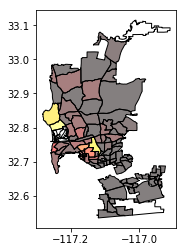

In [14]:
gdf13.plot(column="listings", cmap="hot")

## Heatmap of 2016 Airbnb's in San Diego

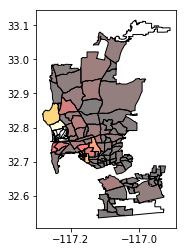

In [15]:
gdf16.plot(column="listings", cmap="hot")

## Let's make a dataframe for the growth of airbnb/growth of rent

In [34]:
import csv 

diff_df = pd.DataFrame(data={"zip": zip_codes}, columns=["zip", "abnb", "rent"])
for ind, row in diff_df.iterrows():
    try:
        t_zip = row["zip"]
        diff_df.loc[ind, "abnb"] = len(df16[df16["zipcode"] == t_zip]) - len(df13[df13["zipcode"] == t_zip]) 
        diff_df.loc[ind, "rent"] = rent_avg_dict[int(t_zip)][1] - rent_avg_dict[int(t_zip)][0]
    except:
        print ("fail")
diff_df = diff_df.dropna()
diff_df





fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


,zip,abnb,rent
1,91913.0,8,228
3,91915.0,7,192.5
14,91910.0,23,345.083
94,92120.0,5,403.583
121,92104.0,68,609.167
226,92101.0,222,102.833
372,92110.0,32,108.833
474,92128.0,5,535.833
484,92130.0,7,593.75
504,92126.0,16,449.167


In [35]:
# import for linear regression test
#import statsmodels.api as sm
#import patsy
import numpy as np
import statsmodels.api as sm

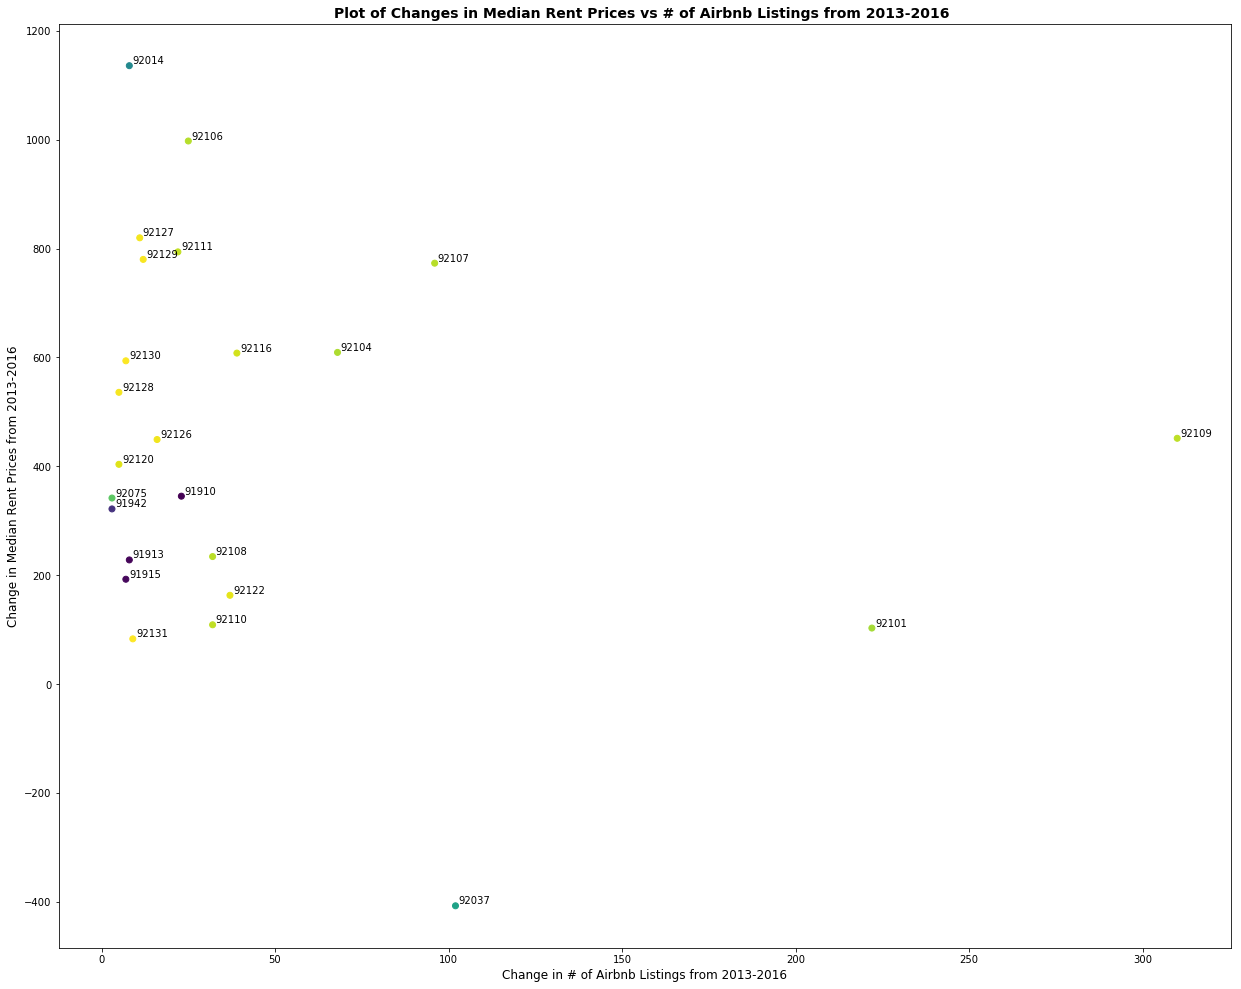

In [36]:

# have to convert abnb column to float first; can probably move this somewhere
diff_df = diff_df.astype(float)
diff_df['zip'] = diff_df['zip'].astype(int)
plt.figure(num=1, figsize=(21,17))

plt.title('Plot of Changes in Median Rent Prices vs # of Airbnb Listings from 2013-2016 ', fontsize=14, fontweight='bold')

plt.xlabel('Change in # of Airbnb Listings from 2013-2016',fontsize=12)
plt.ylabel('Change in Median Rent Prices from 2013-2016',fontsize=12)
plt.scatter(diff_df.abnb, diff_df.rent, c=diff_df.zip)
#plt.plot(np.unique(diff_df.abnb), np.poly1d(np.polyfit(diff_df.abnb, diff_df.rent, 1))(np.unique(diff_df.abnb)))

for label, x, y in zip(diff_df.zip, diff_df.abnb, diff_df.rent):
    plt.annotate(
        label,
        xy=(x, y), xytext=(35, 0),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

We now want to see if the change in density of Airbnb listings in an area have a relationship with the average change in rent in those areas. We first start by reading the dataframe for growth of Airbnb/growth of rent to a csv. 

In [21]:
file = diff_df.to_csv('rent_density.csv')

Now we can use Tableau to visualize the growth of Airbnb and the increase in rent on a map. The location of the circles is indicated by the zip code that they represent. The size of the circle indicates the growth of the number of Airbnb listings from 2013-2016 and the color of circles indicates the change in average rent of the zip code from 2013-2016, with blue being a decrease ranging to red being the highest increase. 

<img src="tableau_2.png">


As we can see, the introduction of Airbnb units is not correlated with decreased rent price. In fact, rent prices appear to have increased in most zipcodes. Whether that is a result of increased Airbnb units is unknown since housing prices in general in San Diego have recently risen.

# Data Analysis / Results

We can now run a regression test to see the correlation, and see the P value for this correlation.

In [37]:

outcome, predictor = patsy.dmatrices('rent ~ abnb', diff_df)
mod = sm.OLS(outcome, predictor)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8413
Date:                Tue, 13 Jun 2017   Prob (F-statistic):              0.369
Time:                        10:26:53   Log-Likelihood:                -173.21
No. Observations:                  24   AIC:                             350.4
Df Residuals:                      22   BIC:                             352.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    485.1163     83.167      5.833      0.0

 Based off an alpha value of **0.05**, and the results above, 
 the change in quantity of Airbnb's does not significantly predict rent prices in the same zip code area, as evidenced in the zip codes of San Diego from 2013-2016.

# Conclusions/Discussion

Our hypothesis is incorrect for this data set, as shown in the regression test. Therefore, we can conclude that the change in quantity of Airbnb's does not significantly predict rent prices in the same zip code area, as evidenced in the zip codes of San Diego from 2013-2016.

This result makes sense, as people don't generally use Airbnbs for long term rentals in the present (it's possible it will become a long term rental service in the future, but right now the housing market is still the go to option for a long term rental (1 month +).

If we were to conduct this experiment again, trying this out on another city, or waiting for a longer period of time would help to followup on whether any new data changes the current results we've seen. Airbnb is definitely continuing to grow at a rapid pace, and no one knows how popular it will be by 2025, as well as how the housing market will have changed as a result of Airbnb's growth and popularity. 

## Followups

It's interesting to analyze the 3 data points that appear to be out of the way and rather separate from the rest of the data. These zip codes are **92037, 92101, 92109**.

##### 92037
This zip code is the La Jolla Shores area, a heavy site of tourism in San Diego. This makes sense, as a lot of people will rent Airbnbs to stay for a few days to a week instead of living long term in the area.

#### 92109
This zip code is the downtown San Diego area, a popular site for tourism as well for conventions and meetings. Again, lots of people would rent Airbnbs/hotels to attend these conventions/meetings which are only for a few days - a few weeks.

#### 92101
This zip code is the Pacific Beach/Mission Bay area, a popular site for tourism due to its proximity to the downtown San Diego area. Similar to above, the high surplus of Airbnbs can be attributed to the correlation of tourism.

Thus these 3 points suggest that in regions of high tourism, the introduction of Airbnb has caused the overall housing prices to decrease, as people are more likely 


The other data points suggest that rent has increased, even if the Airbnbs have increased by a small amount, and this could be attributed to the emergence of San Diego as a growing tech hub as well as inflation causing prices to increase over time, as well as many families looking to stay in San Diego. It could also be a smaller volume of Airbnb's contributing to this change, but without more data/a longer time frame it's hard to gauge.